# Final Project Submission

- Student Name: Deztany Jackson
- Student Pace: Self Pace
- Scheduled Project Review:
- Instructor Name: Morgan Jones
- Blog Post URL:


### Quesitons /Comments
- Aggregate Table for Dataset understanding - mean
- When do we do the TP/FP/TN Stuff?
    - Do cross tab table
- Explore dataset
    - Value Counts: group by Table
    - Graph Prices
    - Historgram of dataset - yes
    - How many of each category is there now....% of dataset
- Look into function of class of cross valudation from workflow model
- How do we get value counts for each column by Catgetory?? EDA
- Plot distribution of the continous numerical values one Way
- Plot categorical numerical values another way?
- Outlier removal How to check?
- Format font and labels in visuals
- Remove warnings from 

## Classification of Paris Housings - Luxury vs Basic

# Business Understanding

Certain Paris Real Estate (RE) investment agencies are looking to invest in luxury properties to lease
out to HotelsVIP Guests of the city and Companies as a "AirBnB" for their employees and clients. There are no rules for foreigners on owning property in France. As one of the  most expensive real estate cities in the world picking prime real estate to buy at the right time is a safe investment.

Classification models will be built to correctly identify "Luxury" property and the best data attributes (features) that help make the best predictions.

It is more important to correctly identify "Luxury" property as best as possible and minimize incorrectly identifying "Basic" property. This will cost having a long list of "Luxury" property but help the RE Investment agencies feel confident in the smaller set of listings.

Due to data imbalance and business goal our main metrics  will be : Precision and F1 

[F1 Score Metric, Joos Kortanje, 2021](https://towardsdatascience.com/the-f1-score-bec2bbc38aa6)

# Data Understanding

### Paris Dataset

This project uses dataset from kaggle and used for Educational Purposes "ParisHousing.csv". The intial dataset starts with 10,000 Rows of data and 18 Features (including "Category" the target value).

[Paris Kaggle Dataset, 2021](https://www.kaggle.com/datasets/mssmartypants/paris-housing-classification)

<table style="width:100%">
<thead>
<tr>
<th style="text-align:center; font-weight: bold; font-size:14px">Feature </th>
<th style="text-align:center; font-weight: bold; font-size:14px">Description</th>
<th style="text-align:center; font-weight: bold; font-size:14px">Data Type</th> 
</tr>
</thead>
<tbody>
<td><b>Category</b></td>
<td>Classification of Real Estate<br> (Basic or Luxury)</td>
<td>Nominal Number</td>
</td>
<tr> 
<td><b>Price</b></td>
<td>Cost of RE<br> (Units unknown)</td>
<td>Cardinal Number</td>
</tr>
<tr> 
<td><b>Building_Size(m)</b></td>
<td>Size of the building<br> (meters)</td>
<td>Cardinal Number</td>
</tr>
<tr>
<td><b>Has_Yard</b></td/>
<td>Has yard <br> (0:No,1:Yes)</td>
<td>Nominal Number</td>
</tr>
<tr>
<td><b>Has_Pool</b></td>
<td>Has Pool <br> (0:No,1:Yes)</td>
<td>Nominal Number</td>
</tr>
<tr>
<td><b>Num_of_Floors</b></td>
<td>Number of Floors</td> (0; 1; 2; 3+)</td>
<td>Nominal Number</td>
</tr>
<tr>
<td><b>Num_of_Rooms</b></td>
<td>Number of Rooms <br> (0; 1; 2; 3+)</td>
<td>Nominal Number</td>
</tr>
<tr>
<td><b>City_Part_Range</b></td>
<td>Thehigher the range, the more exclusive the neighbourhood is<br> </td>
<td>Cardinal Number</td>
</tr>
<tr>
<td><b>City_Code</b></td>
<td>Zipcode<br> </td>(Number)
<td>Nominal Number</td>
</tr>
<tr>
<td><b>Num_Previous_Owners</b></td>
<td>Number of Previous Ownder</td>
<td>Cardinal Number</td>
</tr>
<tr>
<td><b>Garage_Size(m)</b></td>
<td>Size of the garage<br> (meters)</td>
<td>Cardinal Number</td>
</tr>
<tr>
<td><b>Attic_Size(m)</b></td>
<td>Size of the attic<br> (meters)</td>
<td>Cardinal Number</td>
</tr>
<tr>
<td><b>Has_Storm_Protector</b></td>
<td>Has Storm Protector <br> (0:No,1:Yes)</td>
<td>Nominal Number</td>
</tr>
<tr>
<td><b>Basement_Size(m)</b></td>
<td>Size of the basement<br> (meters)</td>
<td>Cardinal Number</td>
</tr>
<tr>
<td><b>Year_Built</b></td>
<td>Year built <br></td>
<td>Nominal Number</td>
</tr>
<tr>
<td><b>Num_of_Guest_Rooms</b></td>
<td>Number of Guest Rooms <br> (0; 1; 2; 3+)</td>
<td>Cardinal Number</td>
</tr>
<tr>
</tr>
<tr>
<td><b>Has_Storage_Room</b></td>
<td>Has Storage Room <br> (0:No,1:Yes)</td>
<td>Nominal Number</td>
</tr>
<tr> 
</tbody>
</table>

[Loan Classification,Kamal Khumar, 2021 ](https://www.kaggle.com/code/kamalkhumar/loan-status-prediction)

In [236]:
#Import packages

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
#from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix,classification_report,recall_score,accuracy_score, auc
from sklearn.metrics import precision_score, f1_score, confusion_matrix, plot_roc_curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, average_precision_score, make_scorer

import warnings
warnings.filterwarnings('ignore')
#from imblearn.metrics import classification_report_im
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline

import pickle

Describe the dataset and where it came from and links [kaggle]

In [64]:
# Import csv file
paris_df = pd.read_csv("data/ParisHousingClass.csv")
paris_df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


This dataset has 10000 rows and 18 columns (including the target)

In [65]:
#Shape of dataset
paris_df.shape

(10000, 18)

In [66]:
#Describe the dataset
paris_df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [67]:
#Information on dataset
paris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

There are no textual values except for the target variable although some are categorical even though they are numerical.

In [68]:
#drop columns that don't seem to add value
paris_df = paris_df.drop(columns="isNewBuilt",axis =1)


In [69]:
#checking shape after deletion
paris_df.shape

(10000, 17)

In [70]:
#Any null values? - No NULL Values
#paris_df.isnull().sum()
#No Null values

In [71]:
#Checking for duplicates - None
#paris_df.duplicated().sum() 

# Describe data Features

- Plot Distribution of data
- Multicolinearity
- Heatmap


In [72]:
#Renaming columns for better clarity
old_cols = []
new_col = ['Building_Size(m)','Num_of_Rooms','Has_Yard','Has_Pool','Num_of_Floors','City_Code','City_Part_Range',
           'Num_Previous_Owners', 'Year_Built','Has_Storm_Protector',
           'Basement_Size(m)','Attic_Size(m)', 'Garage_Size(m)', 'Has_Storage_Room','Num_of_Guest_Rooms','Price','Category']
col_dict = {}
for ind, col in enumerate(paris_df.columns):
    col_dict[col] = new_col[ind]
print(col_dict)
paris_df.rename(columns = col_dict, inplace= True)

{'squareMeters': 'Building_Size(m)', 'numberOfRooms': 'Num_of_Rooms', 'hasYard': 'Has_Yard', 'hasPool': 'Has_Pool', 'floors': 'Num_of_Floors', 'cityCode': 'City_Code', 'cityPartRange': 'City_Part_Range', 'numPrevOwners': 'Num_Previous_Owners', 'made': 'Year_Built', 'hasStormProtector': 'Has_Storm_Protector', 'basement': 'Basement_Size(m)', 'attic': 'Attic_Size(m)', 'garage': 'Garage_Size(m)', 'hasStorageRoom': 'Has_Storage_Room', 'hasGuestRoom': 'Num_of_Guest_Rooms', 'price': 'Price', 'category': 'Category'}


In [73]:
#Are we removing any features for general importance?


In [74]:
#Looking at values based on categories
#Looking at the binary values shows a few things.  Every Luxury home has: Pool, Newly Built,Has Yard and Has Pool
paris_df.groupby(["Category"]).mean()

,Building_Size(m),Num_of_Rooms,Has_Yard,Has_Pool,Num_of_Floors,City_Code,City_Part_Range,Num_Previous_Owners,Year_Built,Has_Storm_Protector,Basement_Size(m),Attic_Size(m),Garage_Size(m),Has_Storage_Room,Num_of_Guest_Rooms,Price
Category,,,,,,,,,,,,,,,,
Basic,49999.331883,50.363251,0.43755,0.423927,50.318374,50181.889410,5.513566,5.535661,2005.469376,0.499485,5045.484946,5034.319977,553.342416,0.502576,4.990841,5.005929e+06
Luxury,48977.982609,50.324901,1.00000,1.000000,49.985771,50526.527273,5.486166,5.425296,2005.620553,0.502767,4947.611067,4984.443478,551.593676,0.505929,5.020553,4.907260e+06


May remove isNewBuilt because it doesnt offer any newer information than the year it was made...redundant

In [75]:
#Pair plot for quick view of the datasets distribution 
#sns.set(rc={'figure.figsize':(20,15)})
#sns.pairplot(paris_df)
paris_df.columns

Index(['Building_Size(m)', 'Num_of_Rooms', 'Has_Yard', 'Has_Pool',
       'Num_of_Floors', 'City_Code', 'City_Part_Range', 'Num_Previous_Owners',
       'Year_Built', 'Has_Storm_Protector', 'Basement_Size(m)',
       'Attic_Size(m)', 'Garage_Size(m)', 'Has_Storage_Room',
       'Num_of_Guest_Rooms', 'Price', 'Category'],
      dtype='object')

#Plot the aVERAGE Price versus Luxury Basic

fig,ax = plt.subplots(figsize =(10,10), facecolor = "white")

ax.hist( paris_df["price"])
plt.ylim([0, 1000000])

ax.legend(labels = ["Basic", "Luxury"])


In [76]:
#Confusion Matrix - Think about loop through some of the categorixal numbers
#Create array with categorical numbers
#pd.crosstab(pdf["Category"],pdf["Has_Pool"])

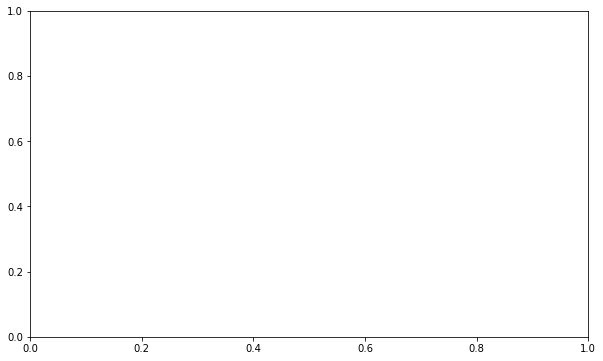

In [77]:
# Model the Category variables vs the Price Histogram with Legend Homecount
#Show a cross tab table
fig, ax = plt.subplots(figsize=(10, 6),facecolor = "white")


# Data Preparation

<AxesSubplot:title={'center':'Verify that class distributuion in train is same as input data'}, xlabel='Category'>

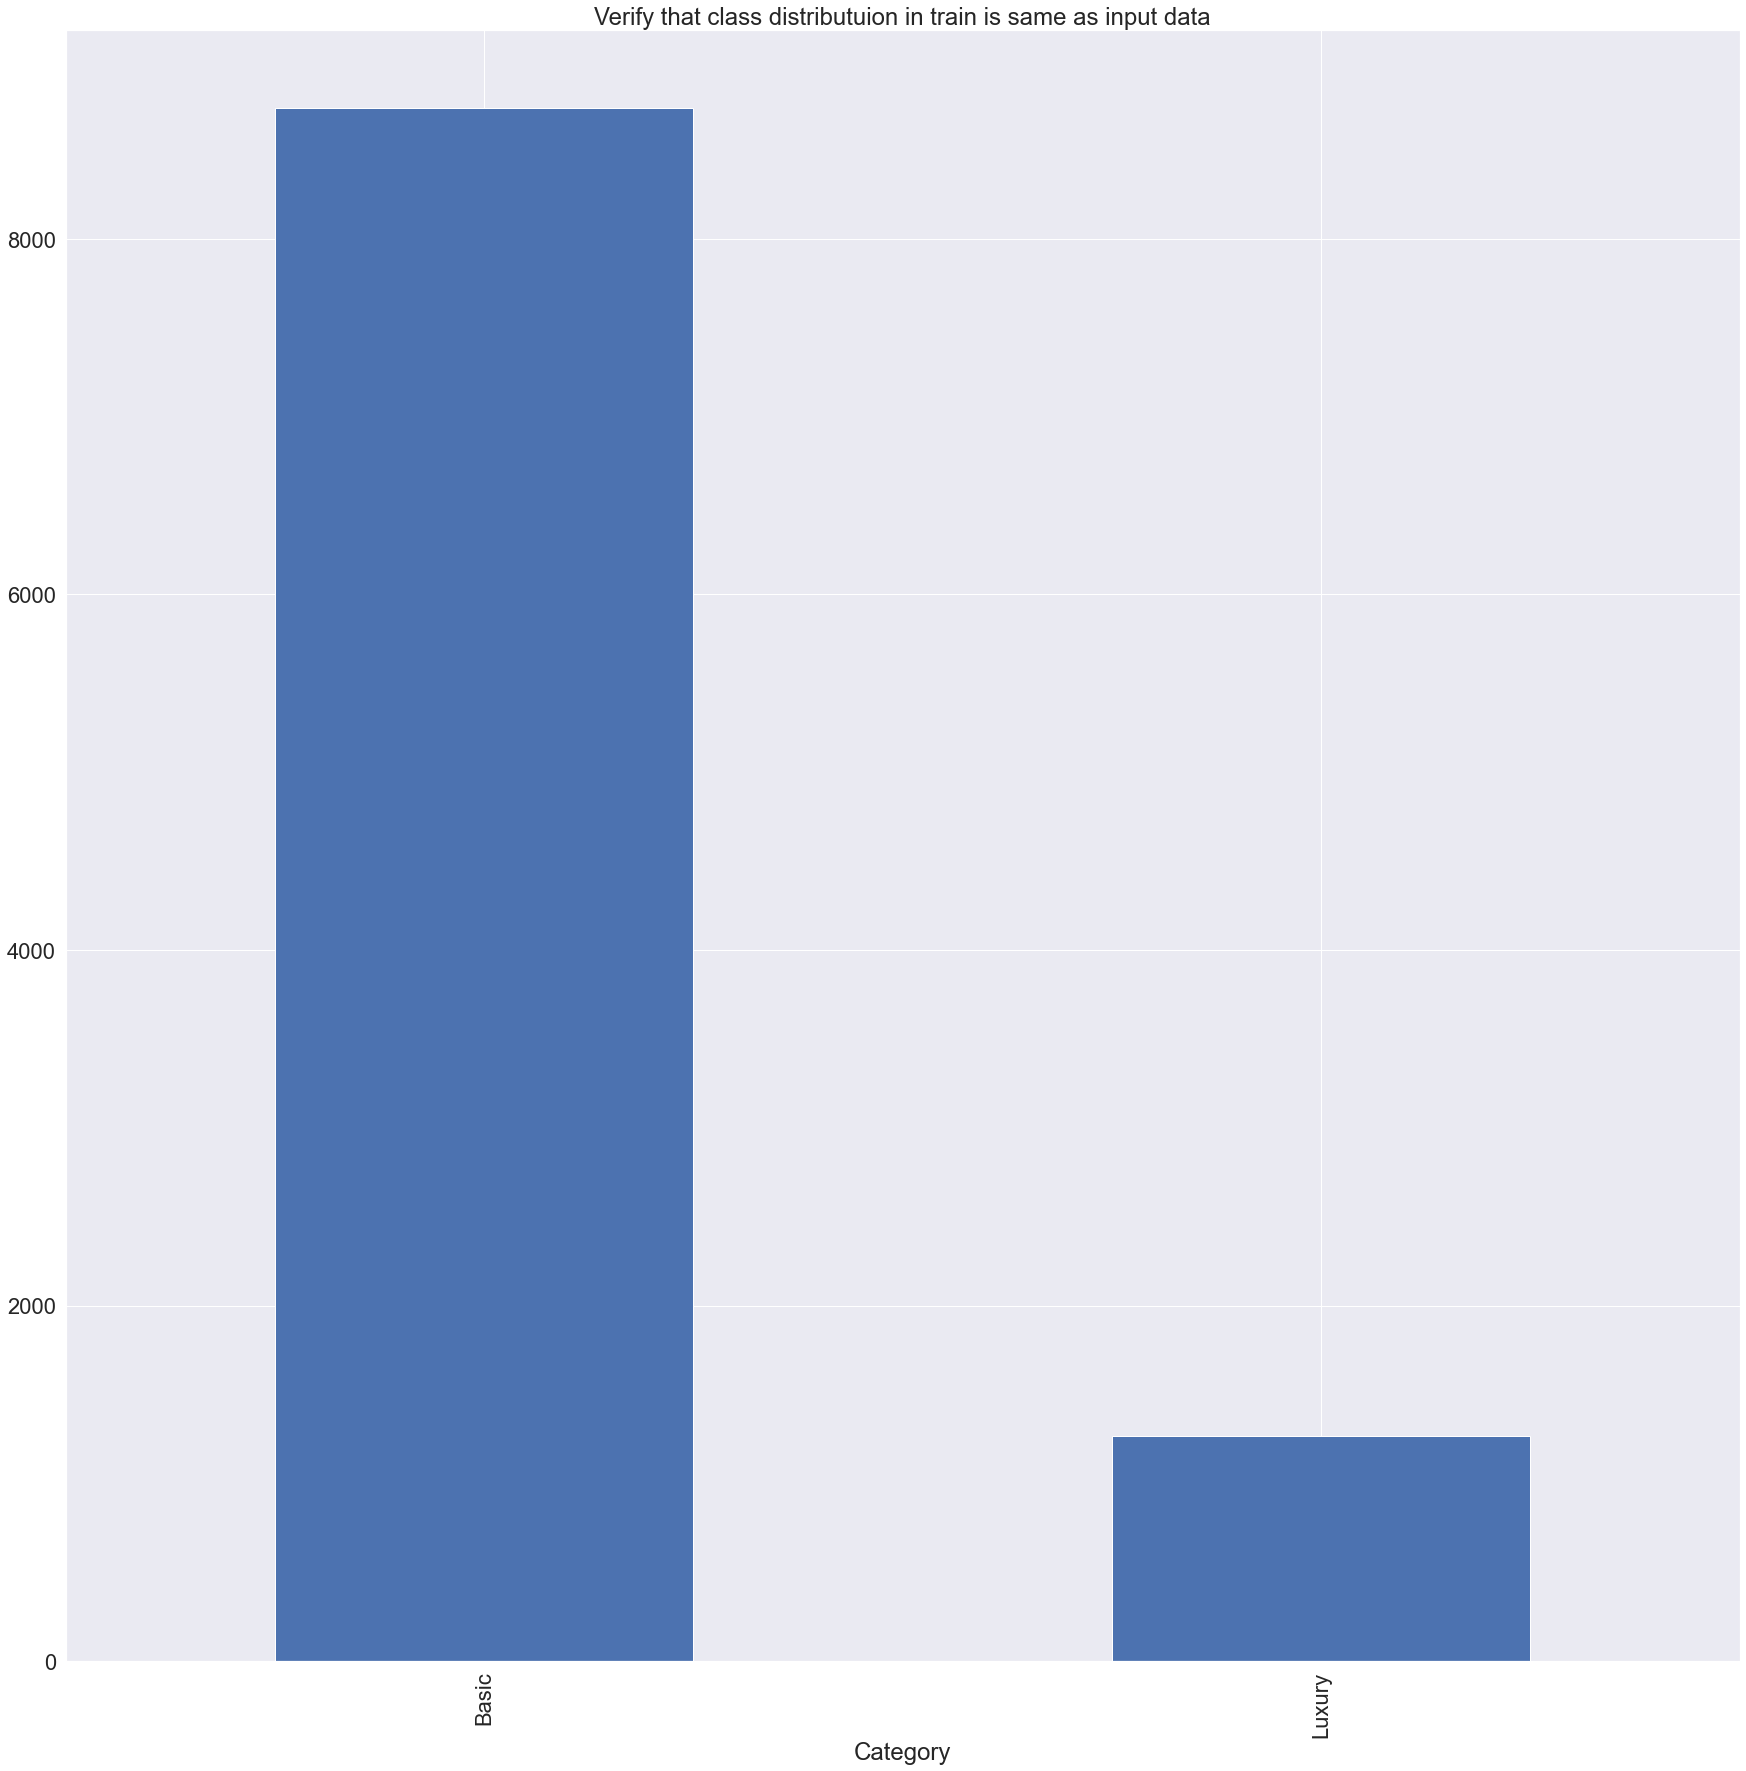

In [238]:
#Distribution of Category Variables
pdf.pivot_table(index='Category', aggfunc='size').plot(kind='bar', title='Verify that class distributuion in train is same as input data')


In [83]:
#Checking to see if the value counts are stratified for imbalance
print(y_test.value_counts())
print(y_train.value_counts())

Basic     2184
Luxury     316
Name: Category, dtype: int64
Basic     6551
Luxury     949
Name: Category, dtype: int64


## Link to EDA Refernce to use
https://www.kaggle.com/code/abdallahaboelkhair/paris-housing-eda-and-model-comparison

#Copy original dataframe
pdf = paris_df.copy()

In [79]:
#Changing Basic and Luxury to numerical values in the Category Column
#cat_dict = {"Basic":0, "Luxury":1}
#pdf["Category"] = pdf["Category"].apply(lambda x:cat_dict[x])

In [80]:
pdf.head()

,Building_Size(m),Num_of_Rooms,Has_Yard,Has_Pool,Num_of_Floors,City_Code,City_Part_Range,Num_Previous_Owners,Year_Built,Has_Storm_Protector,Basement_Size(m),Attic_Size(m),Garage_Size(m),Has_Storage_Room,Num_of_Guest_Rooms,Price,Category
0,75523,3,0,1,63,9373,3,8,2005,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,0,8435,2429,292,1,4,7055052.0,Luxury


In [81]:
X = paris_df.drop("Category", axis = 1)
y = paris_df["Category"]
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, stratify = y)

# Modeling

## Model 1 - Dummy Classifier Model 

[Dummy Classifier- Abiheet Sahoo, 2020 ](https://towardsai.net/p/data-science/dealing-with-class-imbalance%E2%80%8A-%E2%80%8A-dummy-classifiers)

In [84]:
dummy_paris_df = DummyClassifier(strategy="most_frequent")
dummy_paris_df.fit(X_train, y_train)


DummyClassifier(strategy='most_frequent')

In [85]:
cv_results = cross_val_score(dummy_paris_df, X_train, y_train, cv=5)
cv_results.mean()

0.8734666666666666

In [86]:
#Score of guessing Luxury
print("Percent of guess Luxury Accuracy= ", round(1-cv_results.mean(),2), "%")

Percent of guess Luxury Accuracy=  0.13 %


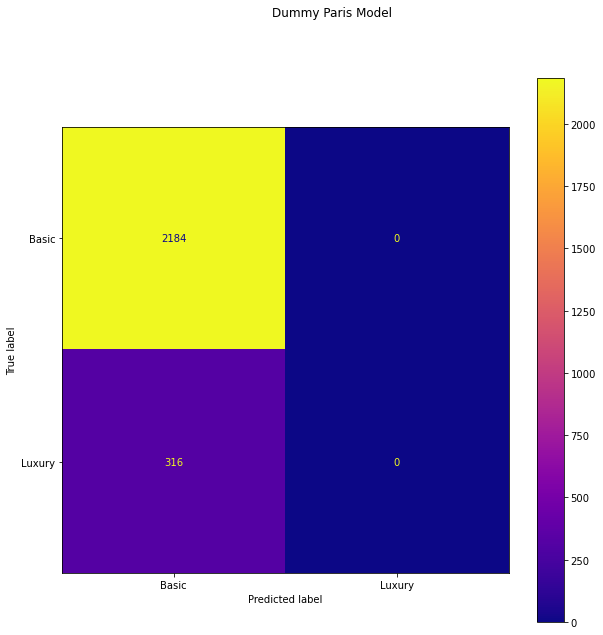

In [87]:
fig, ax = plt.subplots(figsize = (10,10), facecolor = "white")
fig.suptitle("Dummy Paris Model")
plot_confusion_matrix(dummy_paris_df, X_test, y_test, ax=ax, cmap="plasma");
#Increase the font size in the labels

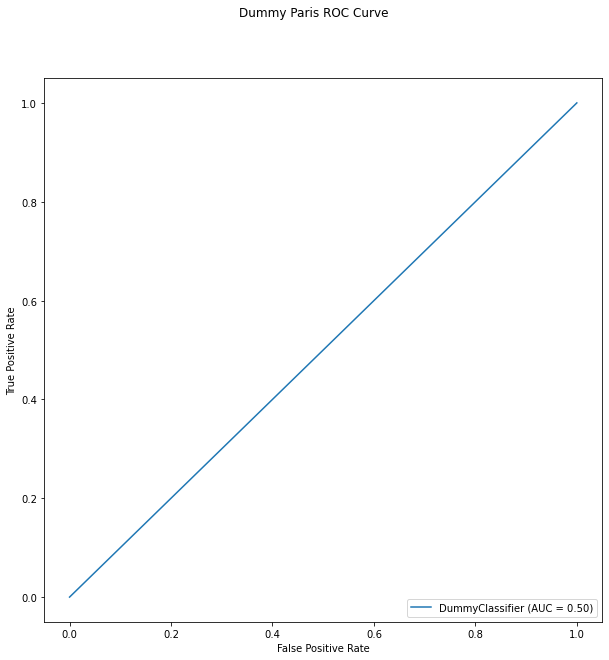

In [88]:
fig, ax = plt.subplots(figsize = (10,10), facecolor = "white")
fig.suptitle("Dummy Paris ROC Curve")
plot_roc_curve(dummy_paris_df, X_test, y_test, ax=ax)
#Increase the font size and labels

What does this tell me?

## Model 2.1 - Logistic Regression Model (Simple Model)

In [245]:
#Function to predict from fitted model
def simple_model_predict(fit_model,X):
    
    y_pred = fit_model.predict(X)
    y_pred_prob = fit_model.predict_proba(X)
    return y_pred, y_pred_prob

In [293]:
#Calculating precision, recall and f1
def precision_recall(y_true,y_pred,pos_label = "Luxury"):
    
    precision = precision_score(y_true, y_pred, pos_label=pos_label)
    recall = np.mean(recall_score(y_true, y_pred, pos_label=pos_label))
    f1 = f1_score(y_true, y_pred, pos_label=pos_label)
    
    print ("The Precision score is: {}".format(precision))
    print ("The Recall score is: {}".format(recall))
    print ("The F1 score is: {}".format(f1))
    print("\n")
    return precision, recall, f1

In [ ]:
def cross_matrix_val():
    #Get cross matrix values

In [246]:
#Instantiate
lr_simple = LogisticRegression(random_state = 42,penalty= "none") 
#Fit training data
lr_simple.fit(X_train,y_train)
#Predict with Train
lr_y_train_pred,lr_y_train_pred_prob  = simple_model_predict(lr_simple,X_train)
#Predict with Train
lr_y_trest_pred,lr_y_test_pred_prob  = simple_model_predict(lr_simple,X_test)


In [294]:
p,r,f = precision_recall(y_train, lr_y_train_pred,"Luxury")

The Precision score is: 0.0
The Recall score is: 0.0
The F1 score is: 0.0




In [266]:
precision_recall(y_train, lr_y_train_pred,"Luxury")

#Precision, Recall and F1
#Train Score
precision_recall(X_train, y_train, "precision", "Luxury")
#Trest Score
precision_recall(lr_simple,X_test, y_test, "precision", "Luxury")

TypeError: cross_val_score() got an unexpected keyword argument 'pos_label'

###  Model 2.1 - Logistic Regression Model (Simple Model) Evaluation

#### Training Data Evaluation

0.0

In [90]:
### Train
scores = cross_val_score(lr_simple, X_train, y_train, cv=5 )
scores.mean()

0.8734666666666666

In [ ]:
#Predict, Recall and F1
lr_simple

In [91]:
#Printing out report with scores -
print(classification_report(y_train, lr_y_train_pred))

              precision    recall  f1-score   support

       Basic       0.87      1.00      0.93      6551
      Luxury       0.00      0.00      0.00       949

    accuracy                           0.87      7500
   macro avg       0.44      0.50      0.47      7500
weighted avg       0.76      0.87      0.81      7500



In [92]:
#Speak to the ability to pick Precision of Basic and none for luxury...imbalanced data

In [93]:
#Print out array confusion matrix
print(confusion_matrix(y_train, lr_y_train_pred, labels = ["Basic","Luxury"]))

[[6551    0]
 [ 949    0]]


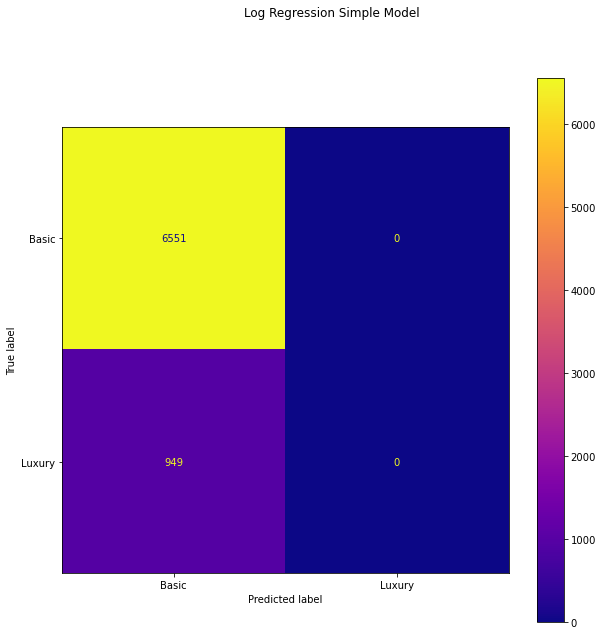

In [94]:
fig, ax = plt.subplots(figsize = (10,10), facecolor = "white")
fig.suptitle("Log Regression Simple Model")
plot_confusion_matrix(lr_simple, X_train, y_train, ax=ax, cmap="plasma");

#### Test Data Evaluation

In [95]:
scores = cross_val_score(lr_simple, X_test, y_test, cv=5 )
scores.mean()

0.8736

In [96]:
#Printing out report with scores -
print(classification_report(y_test, lr_y_test_pred))

              precision    recall  f1-score   support

       Basic       0.87      1.00      0.93      2184
      Luxury       0.00      0.00      0.00       316

    accuracy                           0.87      2500
   macro avg       0.44      0.50      0.47      2500
weighted avg       0.76      0.87      0.81      2500



In [97]:
#Print out array confusion matrix
print(confusion_matrix(y_test, lr_y_test_pred, labels = ["Basic","Luxury"]))

[[2184    0]
 [ 316    0]]


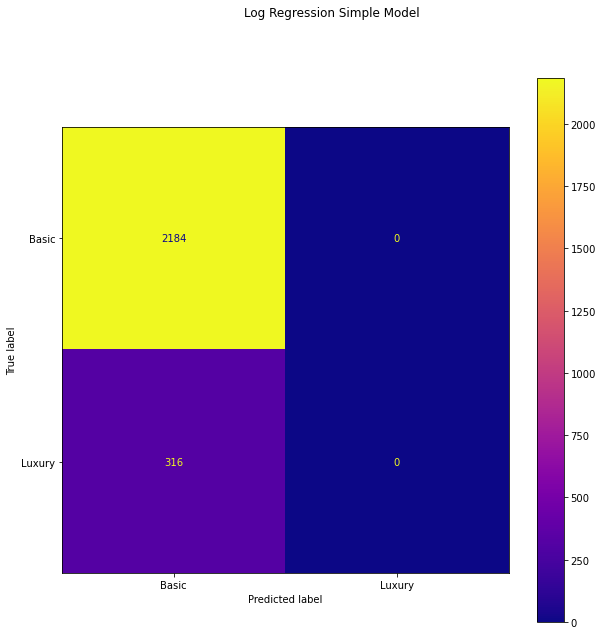

In [98]:
fig, ax = plt.subplots(figsize = (10,10), facecolor = "white")
fig.suptitle("Log Regression Simple Model")
plot_confusion_matrix(lr_simple, X_test, y_test, ax=ax, cmap="plasma");

In [99]:
# Precision decreased slightly with test data, but in the grand scheme of things still not good. Not able to correclty guess Luxury
#Basics was incorreclty guess

## Model 2.2 - Decision Tree Model (Simple Model)

In [100]:
#Instantiate
dt_simple = DecisionTreeClassifier(random_state=42, criterion="entropy")
#Fit training data
dt_simple.fit(X_train,y_train)
#Predict with test
dt_y_train_pred = dt_simple.predict(X_train)
dt_y_test_pred = dt_simple.predict(X_test)
dt_y_test_prob = dt_simple.predict_proba(X_test)

#### Train  Data Evaluation

In [101]:
scores = cross_val_score(dt_simple, X_train, y_train, cv=5 )
scores.mean()

0.8720000000000001

In [102]:
#Printing out report with scores -
print(classification_report(y_train, dt_y_train_pred))

              precision    recall  f1-score   support

       Basic       1.00      1.00      1.00      6551
      Luxury       1.00      1.00      1.00       949

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



In [103]:
print(confusion_matrix(y_train, dt_y_train_pred, labels = ["Basic","Luxury"]))

[[6551    0]
 [   0  949]]


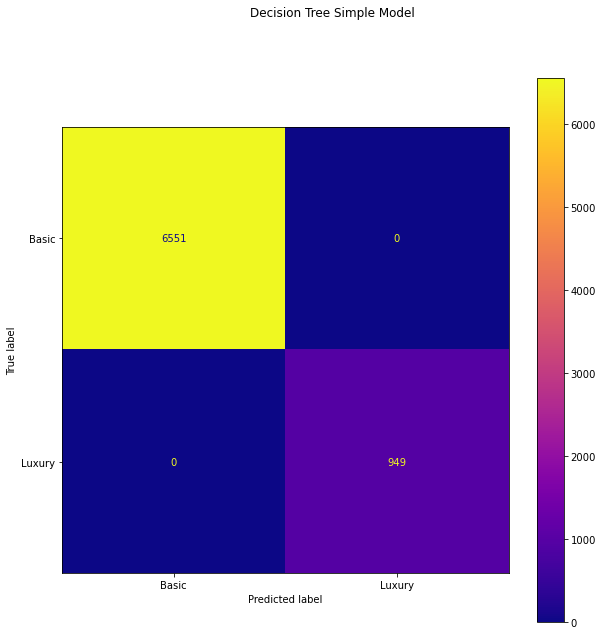

In [104]:
fig, ax = plt.subplots(figsize = (10,10), facecolor = "white")
fig.suptitle("Decision Tree Simple Model")
plot_confusion_matrix(dt_simple, X_train, y_train, ax=ax, cmap="plasma");

#### Test Data Evaluation

In [105]:
scores = cross_val_score(dt_simple, X_test, y_test, cv=5 )
scores.mean()

0.8704000000000001

In [106]:
print(confusion_matrix(y_test, dt_y_test_pred, labels = ["Basic","Luxury"]))

[[2015  169]
 [ 170  146]]


In [107]:
print(classification_report(y_test, dt_y_test_pred))

              precision    recall  f1-score   support

       Basic       0.92      0.92      0.92      2184
      Luxury       0.46      0.46      0.46       316

    accuracy                           0.86      2500
   macro avg       0.69      0.69      0.69      2500
weighted avg       0.86      0.86      0.86      2500



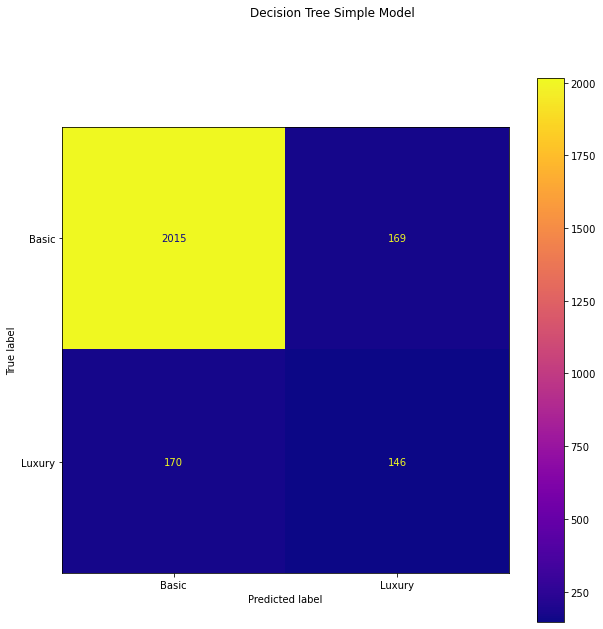

In [108]:
fig, ax = plt.subplots(figsize = (10,10), facecolor = "white")
fig.suptitle("Decision Tree Simple Model")
plot_confusion_matrix(dt_simple, X_test, y_test, ax=ax, cmap="plasma");

[Explaination of Precsion/Recall Curve Use](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)

In [109]:
## Add the Precision/Recall Curve to the decison tree stuff
#probability of luxury scores only

dt_precision,dt_recall, _ = precision_recall_curve(y_test, dt_y_test_prob[:,1],pos_label=[ "Luxury"])
#dt_f1 = f1_score(y_test, dt_y_test_pred, pos_label=['Basic', 'Luxury']) 
dt_auc =  auc(dt_recall, dt_precision)
print("auc:", round(dt_auc,2))
#print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))            

auc: 0.5


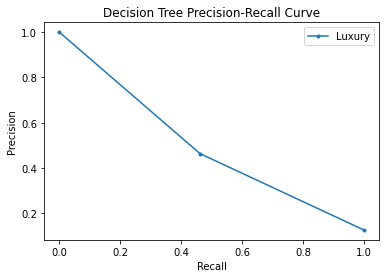

In [110]:
plt.plot(dt_recall, dt_precision, marker='.', label='Luxury')
#axis labels
plt.title("Decision Tree Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
#Legend
plt.legend()

In [111]:
## Optional, show visualization of tree

## Model 2.3 - Random Forest Model (Simple Model)

In [112]:
#Instantiate
rf_simple = RandomForestClassifier(random_state = 42) 
#Fit training data
rf_simple.fit(X_train,y_train)
#Predict with test
rf_y_train_pred = rf_simple.predict(X_train)
rf_y_test_pred = rf_simple.predict(X_test)
rf_y_test_prob = rf_simple.predict_proba(X_test)

#### Train Data Evaluation

In [113]:
scores = cross_val_score(rf_simple, X_train, y_train, cv=5 )
scores.mean()

0.8661333333333333

In [114]:
print(confusion_matrix(y_train, rf_y_train_pred, labels = ["Basic","Luxury"]))

[[6551    0]
 [   0  949]]


In [115]:
print(classification_report(y_train, rf_y_train_pred))

              precision    recall  f1-score   support

       Basic       1.00      1.00      1.00      6551
      Luxury       1.00      1.00      1.00       949

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



#### Test Data Evaluation

In [116]:
scores = cross_val_score(rf_simple, X_test, y_test, cv=5 )
scores.mean()

0.8720000000000001

In [117]:
print(confusion_matrix(y_test, rf_y_test_pred, labels = ["Basic","Luxury"]))

[[2080  104]
 [ 204  112]]


In [118]:
print(classification_report(y_test, rf_y_test_pred))

              precision    recall  f1-score   support

       Basic       0.91      0.95      0.93      2184
      Luxury       0.52      0.35      0.42       316

    accuracy                           0.88      2500
   macro avg       0.71      0.65      0.68      2500
weighted avg       0.86      0.88      0.87      2500



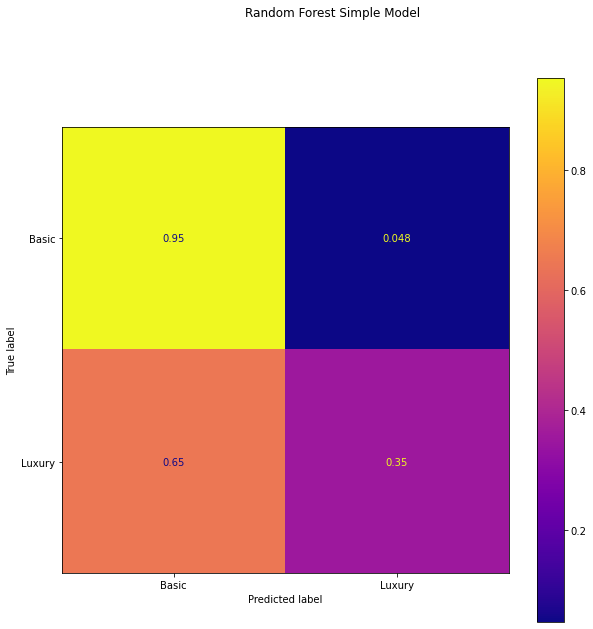

In [119]:
fig, ax = plt.subplots(figsize = (10,10), facecolor = "white")
fig.suptitle("Random Forest Simple Model")
plot_confusion_matrix(rf_simple, X_test, y_test, ax=ax,normalize = "true", cmap="plasma");

In [120]:
## Add the Precision/Recall Curve to the decison tree stuff
#probability of luxury scores only


rf_precision,rf_recall, _ = precision_recall_curve(y_test, rf_y_test_prob[:,1],pos_label=[ "Luxury"])
rf_auc =  auc(rf_recall, rf_precision)
print("auc:", round(rf_auc,2))


auc: 0.49


In [121]:
rf_recall

array([1.        , 0.99683544, 0.99367089, 0.99050633, 0.98734177,
       0.98417722, 0.97151899, 0.95886076, 0.94936709, 0.93670886,
       0.91139241, 0.88291139, 0.86708861, 0.83544304, 0.80379747,
       0.78481013, 0.75632911, 0.70886076, 0.66455696, 0.61708861,
       0.55379747, 0.49683544, 0.44303797, 0.39873418, 0.35443038,
       0.31012658, 0.25949367, 0.23101266, 0.18987342, 0.15189873,
       0.10443038, 0.08227848, 0.07278481, 0.04746835, 0.02848101,
       0.02531646, 0.0221519 , 0.01582278, 0.01582278, 0.01265823,
       0.00632911, 0.00316456, 0.00316456, 0.        , 0.        ])

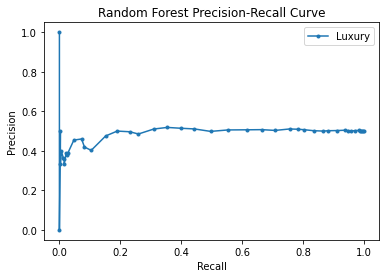

In [122]:
plt.plot(rf_recall, rf_precision, marker='.', label='Luxury')
#axis labels
plt.title("Random Forest Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
#Legend
plt.legend()

## Model 2.4 - KNN Model (Simple Model) - Time Permitting

## Data Prep - SMOTE [Imbalance] and scale and Pipeline
[Logistric Regression Cumulative Lab](https://github.com/learn-co-curriculum/dsc-logistic-regression-lab/tree/solution)

#### Log Reg with smote non pipleline

In [123]:
#Smote, Scaler Pipeline
#Fit Training
#Predict Training 
#Predict Test

#Score training
#Score Test
#Confusion Matrix
#Report
#Precision Recall Curve

In [288]:
#{"AUC":"roc_auc", "Accuracy": "accuracy", "F1":"f1", "Precision":"precision", "Recall":"recall"}
precision_recall(y_test, y_test_pred,"Luxury")

The Precision score is: 0.5052410901467506




LogisticRegression(random_state=42) Classifier
------------------------------------------------------------


Pipeline(steps=[('ct', StandardScaler()), ('sm', SMOTE(random_state=42)),
                ('lgr', LogisticRegression(random_state=42))])


Training Accuracy score:0.87
Testing Accuracy score:0.87


Classification Report:
               precision    recall  f1-score   support

       Basic       1.00      0.85      0.92      2184
      Luxury       0.50      1.00      0.67       316

    accuracy                           0.87      2500
   macro avg       0.75      0.93      0.79      2500
weighted avg       0.94      0.87      0.89      2500



Confusion Matrix: 
 [[2080  104]
 [ 204  112]]




------------------------------------------------------------


DecisionTreeClassifier(random_state=42) Classifier
------------------------------------------------------------


Pipeline(steps=[('ct', StandardScaler()), ('sm', SMOTE(random_state=42)),
                ('dt', DecisionTreeCl

<Figure size 432x432 with 0 Axes>

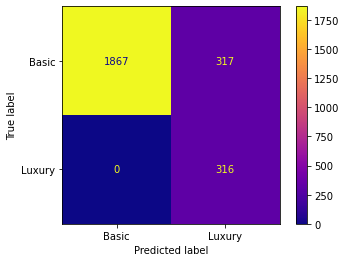

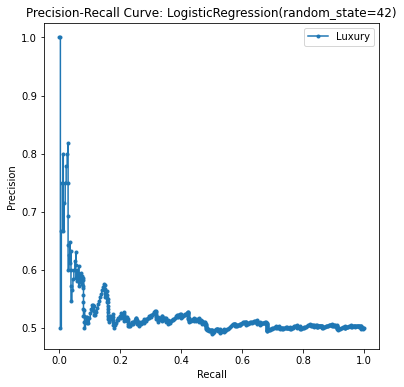

<Figure size 432x432 with 0 Axes>

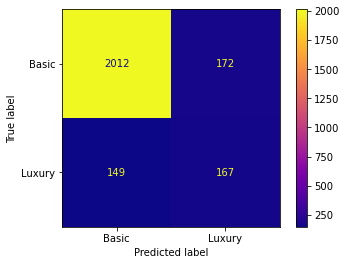

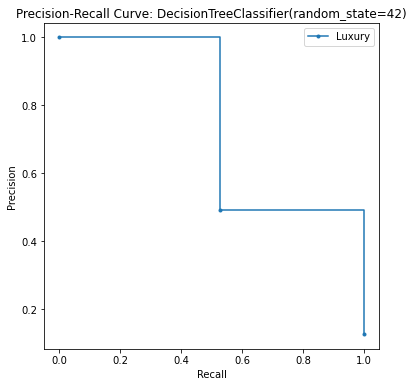

<Figure size 432x432 with 0 Axes>

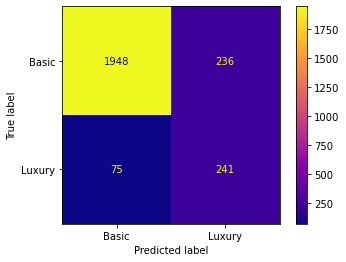

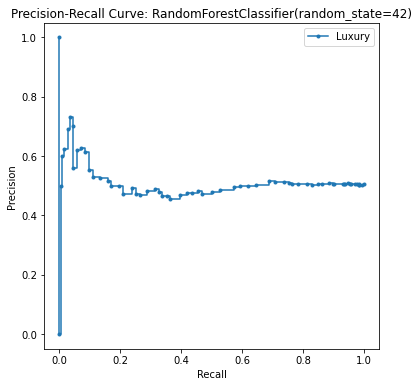

In [125]:
#Create a function, run loop for each type of classifier
#Log Regression, Decision Tree, Random Forest

#Create Pipeline for each classifier 
# create list of classifiers 
clf_dict = {"lgr":LogisticRegression(random_state=42), "dt":DecisionTreeClassifier(random_state=42), "rf":RandomForestClassifier(random_state=42)}
pipe_dict = {}
for name,clf in clf_dict.items():
    
    #Name of Classifier
    print("{} Classifier".format(clf))
    print('---' * 20)
    print("\n")
    
    
    #Create pipelines
    imb_pipe = ImPipeline(steps=[('ct', StandardScaler()),
                                 ('sm', SMOTE( random_state=42)),
                                 (name, clf)])
    
    print(imb_pipe)
    print("\n")
    
    #fitting the pipeline on the training data
    imb_pipe.fit(X_train, y_train)
    
    
    
    #Training Accuracy score
    print("Training Accuracy score:{0:0.2f}".format(imb_pipe.score(X_train, y_train)))
    
    #Testing Accuracy score
    print("Testing Accuracy score:{0:0.2f}".format(imb_pipe.score(X_test, y_test)))
    print("\n")
    
    #Creating a dictionary of the different pipelines
    pipe_dict[name] = imb_pipe
    
    #Predicting the new data
    y_test_pred = imb_pipe.predict(X_test)
    
    #Predicting the new data
    y_test_prob = imb_pipe.predict_proba(X_test)
    y_test_prob = y_test_prob[:,1]
    
    #Classification Report
    print("Classification Report:\n",classification_report(y_test, y_test_pred))
    print("\n")
    
    #Confusion Matrix
    cf_matrix = confusion_matrix(y_test, rf_y_test_pred, labels = ["Basic","Luxury"])
    print("Confusion Matrix: \n", cf_matrix)
    print("\n")
    

    #Plot Confusion Map Matrix
    fig = plt.figure(figsize = (6,6), facecolor = "white")
    fig.suptitle(" {} with SMOTE".format(clf))
    plot_confusion_matrix(imb_pipe, X_test, y_test, cmap="plasma")
    print("\n")
 
    #Plotting Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_test_prob, pos_label= "Luxury")
    
    fig= plt.figure(figsize = (6,6))
    plt.step(recall, precision, marker='.', label='Luxury')
    
    #axis labels
    plt.title("Precision-Recall Curve: {}".format(clf))
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    
    #Legend
    plt.legend()
    print('---' * 20)
    print("\n")
    
    
   
   
        
    

In [126]:
cus_rec = make_scorer(recall_score,pos_label="Luxury")
cus_prec = make_scorer(precision_score,pos_label="Luxury")
cus_f1 =  make_scorer(f1_score,pos_label="Luxury")
#cus_auc =  make_scorer()
cus_accur =  make_scorer(accuracy_score)
scoring = {"Precision":cus_prec,"Rec": cus_rec,"F1":cus_f1,"Accuracy":cus_accur}

In [127]:
#Used to print out results form gridsearch

def gridsearch_score(grid_name):
    
    print("Best Estimator:", grid_name.best_estimator_)
    print("\n")
    print("Best Paremeters:", grid_name.best_params_) 
    print("\n")
    print("Best Precision Score:", grid_name.best_score_)
    print("\n") 

    #Getting prediction value
    gs_y_pred_train = grid_name.predict(X_train)
    #Getting prediction value
    gs_y_pred_test = grid_name.predict(X_test)
    
    
    #Checking our metrics to see how well our model performed
    print("Best Train Estimator Score:", grid_name.best_estimator_.score(X_train, gs_y_pred_train))
    print("Train Classification Report:\n", classification_report(y_train, gs_y_pred_train))
    print("\n")
    print("Best Train Estimator Score:", grid_name.best_estimator_.score(X_test, gs_y_pred_test))
    print("Test Classification Report:\n", classification_report(y_test, gs_y_pred_test))
    print('---' * 20)
    print("\n")
    

### LogisticRegression GridsearchCV

In [128]:
parameters = {"sm__sampling_strategy":["minority",.2,.6],
                      'lgr__penalty': ["none","l1"'l2', 'elasticnet'],
                      'lgr__solver': ["lbfgs", "liblinear", "saga"]}

gs_lgr = GridSearchCV(estimator= pipe_dict["lgr"], param_grid=parameters,
n_jobs= 3, refit = "Precision", scoring=scoring, return_train_score= True)

In [129]:
gs_lgr.fit(X_train, y_train)


GridSearchCV(estimator=Pipeline(steps=[('ct', StandardScaler()),
                                       ('sm', SMOTE(random_state=42)),
                                       ('lgr',
                                        LogisticRegression(random_state=42))]),
             n_jobs=3,
             param_grid={'lgr__penalty': ['none', 'l1l2', 'elasticnet'],
                         'lgr__solver': ['lbfgs', 'liblinear', 'saga'],
                         'sm__sampling_strategy': ['minority', 0.2, 0.6]},
             refit='Precision', return_train_score=True,
             scoring={'Accuracy': make_scorer(accuracy_score),
                      'F1': make_scorer(f1_score, pos_label=Luxury),
                      'Precision': make_scorer(precision_score, pos_label=Luxury),
                      'Rec': make_scorer(recall_score, pos_label=Luxury)})

In [130]:
gridsearch_score(gs_lgr)

Best Estimator: Pipeline(steps=[('ct', StandardScaler()),
                ('sm', SMOTE(random_state=42, sampling_strategy='minority')),
                ('lgr', LogisticRegression(penalty='none', random_state=42))])


Best Paremeters: {'lgr__penalty': 'none', 'lgr__solver': 'lbfgs', 'sm__sampling_strategy': 'minority'}


Best Precision Score: 0.491081404082648


Best Train Estimator Score: 1.0
Train Classification Report:
               precision    recall  f1-score   support

       Basic       1.00      0.85      0.92      6551
      Luxury       0.49      1.00      0.66       949

    accuracy                           0.87      7500
   macro avg       0.75      0.92      0.79      7500
weighted avg       0.94      0.87      0.89      7500



Best Train Estimator Score: 1.0
Test Classification Report:
               precision    recall  f1-score   support

       Basic       1.00      0.85      0.92      2184
      Luxury       0.50      1.00      0.67       316

    accuracy        

### DecisionTree GridsearchCV

In [131]:
parameters = {"sm__sampling_strategy":["minority",.2,.6],
                      'dt__criterion': ["gini", "entropy"],
                      'dt__max_depth': [None, 5,100],
                      'dt__min_samples_split': [2,7,9],
                      'dt__min_samples_leaf': [2,5,7]}

gs_dt = GridSearchCV(estimator= pipe_dict["dt"], param_grid=parameters,
n_jobs= 3, refit = "Precision", scoring=scoring, return_train_score= True)



In [132]:
gs_dt.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('ct', StandardScaler()),
                                       ('sm', SMOTE(random_state=42)),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=3,
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': [None, 5, 100],
                         'dt__min_samples_leaf': [2, 5, 7],
                         'dt__min_samples_split': [2, 7, 9],
                         'sm__sampling_strategy': ['minority', 0.2, 0.6]},
             refit='Precision', return_train_score=True,
             scoring={'Accuracy': make_scorer(accuracy_score),
                      'F1': make_scorer(f1_score, pos_label=Luxury),
                      'Precision': make_scorer(precision_score, pos_label=Luxury),
                      'Rec': make_scorer(recall_score, pos_label=Luxury)})

In [133]:
gridsearch_score(gs_dt)

Best Estimator: Pipeline(steps=[('ct', StandardScaler()),
                ('sm', SMOTE(random_state=42, sampling_strategy='minority')),
                ('dt',
                 DecisionTreeClassifier(min_samples_leaf=7, random_state=42))])


Best Paremeters: {'dt__criterion': 'gini', 'dt__max_depth': None, 'dt__min_samples_leaf': 7, 'dt__min_samples_split': 2, 'sm__sampling_strategy': 'minority'}


Best Precision Score: 0.5104866800724549


Best Train Estimator Score: 1.0
Train Classification Report:
               precision    recall  f1-score   support

       Basic       0.98      0.96      0.97      6551
      Luxury       0.76      0.85      0.80       949

    accuracy                           0.95      7500
   macro avg       0.87      0.91      0.89      7500
weighted avg       0.95      0.95      0.95      7500



Best Train Estimator Score: 1.0
Test Classification Report:
               precision    recall  f1-score   support

       Basic       0.95      0.92      0.93      

### Random Forest GridsearchCV

In [134]:
parameters = {"sm__sampling_strategy":["minority",.2,.6],
                      'rf__n_estimators': [10,50,75],
                      'rf__criterion': ["gini", "entropy"],
                      'rf__max_depth': [None, 5,15,25,50],
                      'rf__min_samples_leaf': [2,5,7]}

gs_rf = GridSearchCV(estimator= pipe_dict["rf"], param_grid=parameters,
n_jobs= 3, refit = "Precision", scoring=scoring, return_train_score= True)

In [135]:

gs_rf.fit(X_train, y_train)


GridSearchCV(estimator=Pipeline(steps=[('ct', StandardScaler()),
                                       ('sm', SMOTE(random_state=42)),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=3,
             param_grid={'rf__criterion': ['gini', 'entropy'],
                         'rf__max_depth': [None, 5, 15, 25, 50],
                         'rf__min_samples_leaf': [2, 5, 7],
                         'rf__n_estimators': [10, 50, 75],
                         'sm__sampling_strategy': ['minority', 0.2, 0.6]},
             refit='Precision', return_train_score=True,
             scoring={'Accuracy': make_scorer(accuracy_score),
                      'F1': make_scorer(f1_score, pos_label=Luxury),
                      'Precision': make_scorer(precision_score, pos_label=Luxury),
                      'Rec': make_scorer(recall_score, pos_label=Luxury)})

In [136]:
gridsearch_score(gs_rf)

Best Estimator: Pipeline(steps=[('ct', StandardScaler()),
                ('sm', SMOTE(random_state=42, sampling_strategy=0.2)),
                ('rf',
                 RandomForestClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=7, n_estimators=10,
                                        random_state=42))])


Best Paremeters: {'rf__criterion': 'entropy', 'rf__max_depth': 5, 'rf__min_samples_leaf': 7, 'rf__n_estimators': 10, 'sm__sampling_strategy': 0.2}


Best Precision Score: 0.557936507936508


Best Train Estimator Score: 1.0
Train Classification Report:
               precision    recall  f1-score   support

       Basic       0.89      0.99      0.94      6551
      Luxury       0.64      0.12      0.21       949

    accuracy                           0.88      7500
   macro avg       0.77      0.56      0.57      7500
weighted avg       0.86      0.88      0.84      7500



Best Train Estimator Score: 1.0
Test Classification R

## Choose Best Estimator

In [137]:
#Confusion
 
#Graph best estimators confusion and map
#gRAPH THE pRECISION Recall curve

#Piuck best features
#TABLE AND GRAPH BEST features

#Filter features
#Run best features with estimator and compare scores
#Plot

#Eval
#Recommendations and Limitations *(Technical anD Business)

#EDA
#Business and DATA
#Format

    

In [147]:
#Confusion Matrix
y_gs_rf_pred = gs_rf.best_estimator_.predict(X_test)
confusion_matrix(y_test,y_gs_rf_pred)

array([[2164,   20],
       [ 292,   24]])

In [152]:
gs_rf.best_estimator_

Pipeline(steps=[('ct', StandardScaler()),
                ('sm', SMOTE(random_state=42, sampling_strategy=0.2)),
                ('rf',
                 RandomForestClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=7, n_estimators=10,
                                        random_state=42))])

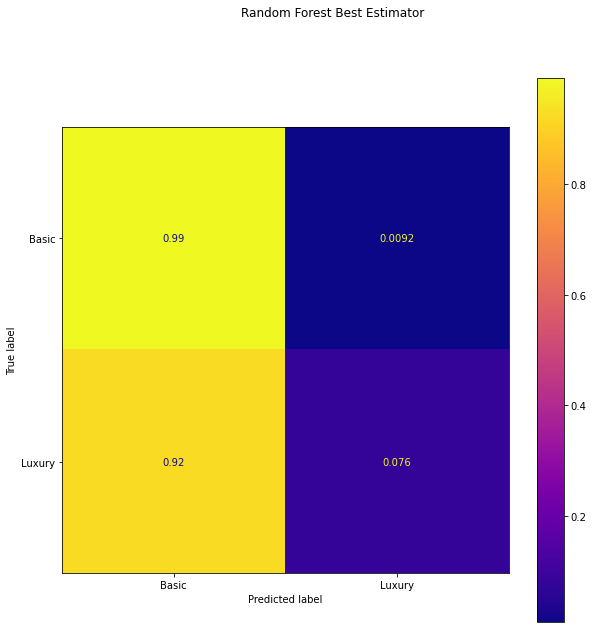

In [154]:
#Map Confusion Matrix
fig, ax = plt.subplots(figsize = (10,10), facecolor = "white")
fig.suptitle("Random Forest Best Estimator")
plot_confusion_matrix(gs_rf.best_estimator_, X_test, y_test,ax=ax, normalize= "true", cmap="plasma");

In [157]:
#Precision Recall on best estimator
y_gs_rf_prob = gs_rf.best_estimator_.predict_proba(X_test)
gs_rf_precision,gs_rf_recall, _ = precision_recall_curve(y_test, y_gs_rf_prob[:,1],pos_label=[ "Luxury"])
rf_auc =  auc(gs_rf_recall, gs_rf_precision)
print("auc:", round(rf_auc,2))


auc: 0.52


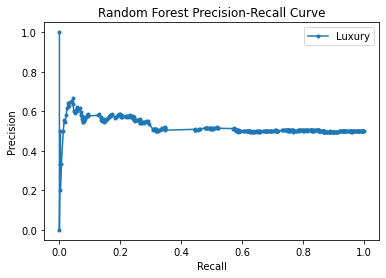

In [161]:
#Get the precision and recall scores from the best estimator
fig= plt.plot(figsize = (15,15), facecolor = "white")
plt.plot(gs_rf_recall, gs_rf_precision, marker='.', label='Luxury')
#axis labels
plt.title("Random Forest Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
#Legend
plt.legend()


## Feature Selection
[Joshua Code, Feature Engineering]

In [175]:
#Get the best features from the best  model
#Then do the pipeline on it

#rf_clf = RandomForestClassifier(criterion='entropy', max_depth=5,min_samples_leaf=7, n_estimators=10,random_state=42)

best_model = gs_rf.best_estimator_
feat_importance = best_model.steps[2][1].feature_importances_

In [177]:
columns = X_train.columns

In [197]:
rf_imp_features  = pd.DataFrame({"Features": columns,"Importance_Level": feat_importance})
rf_imp_features = rf_imp_features.sort_values(by = "Importance_Level",axis = 0, ascending=False, ignore_index = True)
rf_imp_features

,Features,Importance_Level
0,Has_Yard,0.510498
1,Has_Pool,0.439397
2,Num_of_Guest_Rooms,0.008769
3,Num_of_Rooms,0.007498
4,Building_Size(m),0.007118
5,Basement_Size(m),0.005478
6,Year_Built,0.004575
7,Price,0.004121
8,Num_of_Floors,0.003369
9,Attic_Size(m),0.003365


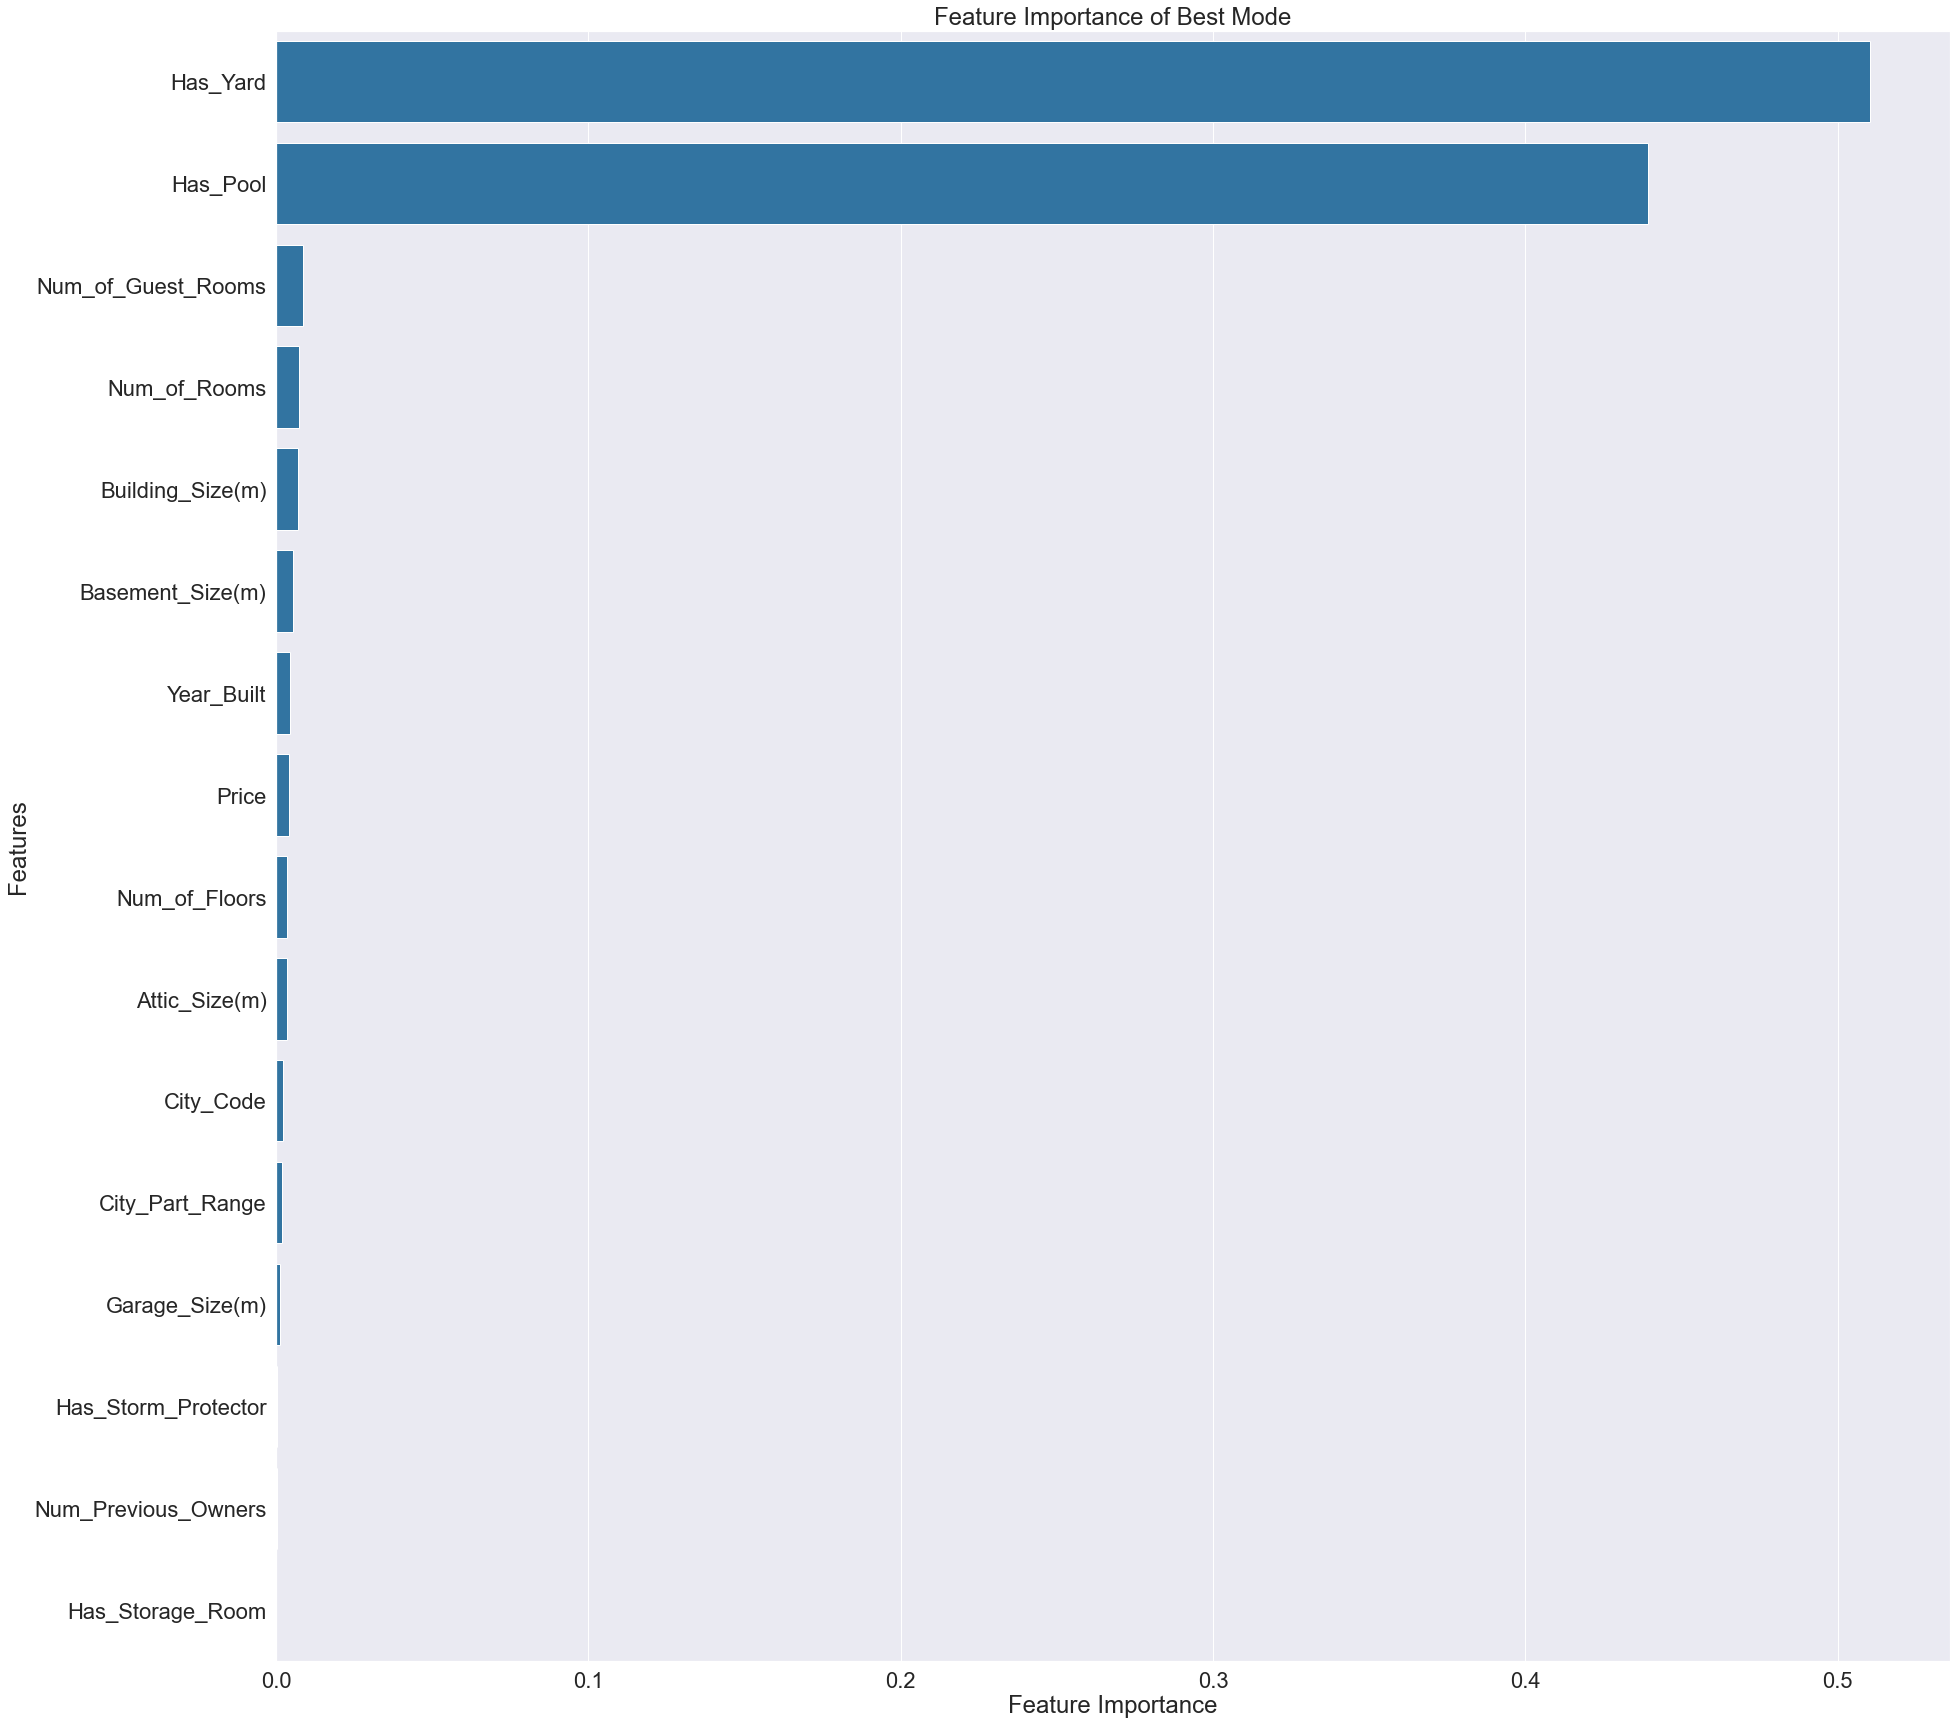

In [215]:
#Plotting Importance from Best Model
sns.barplot(x = feat_importance, 
            y = columns, 
            data = rf_imp_features,
            color = 'tab:blue',
            order=rf_imp_features["Features"],
            orient = 'h')
sns.set(rc={'figure.figsize':(30,30)},font_scale= 2)
plt.title("Feature Importance of Best Mode",)
plt.xlabel('Feature Importance of Best Model')
plt.ylabel('Features')
plt.show()

#change size of labels

In [235]:
# Choose top 5 Features

#Top 5 Features
rf_imp_features[0:5]


,Features,Importance_Level
0,Has_Yard,0.510498
1,Has_Pool,0.439397
2,Num_of_Guest_Rooms,0.008769
3,Num_of_Rooms,0.007498
4,Building_Size(m),0.007118


In [142]:
"""Findings and Recommendations
In the previous two projects, the framing was primarily descriptive and inferential, meaning that you were trying to understand the distributions of variables and the relationship between them. For this project you can still use these techniques, but make sure you are also using a predictive approach.

A predictive finding might include:

How well your model is able to predict the target
What features are most important to your model
A predictive recommendation might include:

The contexts/situations where the predictions made by your model would and would not be useful for your stakeholder and business problem
Suggestions for how the business might modify certain input variables to achieve certain target results

"""

'Findings and Recommendations\nIn the previous two projects, the framing was primarily descriptive and inferential, meaning that you were trying to understand the distributions of variables and the relationship between them. For this project you can still use these techniques, but make sure you are also using a predictive approach.\n\nA predictive finding might include:\n\nHow well your model is able to predict the target\nWhat features are most important to your model\nA predictive recommendation might include:\n\nThe contexts/situations where the predictions made by your model would and would not be useful for your stakeholder and business problem\nSuggestions for how the business might modify certain input variables to achieve certain target results\n\n'

In [143]:
gs_rf.best_index_

181

## 3rd Iteration - Choose best model to go on with [Grid/Random Searching ] Maybe Random Forest with pipeline

## Choose best features to do final mode with

# Evaluation

## Things to combe back and add

[Frequency dist of values in variables](https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial#9.-Exploratory-data-analysis-) 
[Visualize Decision Tree]

In [144]:
#Pick
filename = 'gridsearch__model.pkl'

In [145]:
pickle.dump(rf_gs, open(filename, 'wb'))

NameError: name 'rf_gs' is not defined